# PCA
PCA = Principal Component Analysis, analiza głównych składowych.

Kolejne kroki analizy głównych składowych prowadzą do skonstruuowania nowej przestrzeni obserwacji, w której wyjściowe zmienne są zastąpione nowymi, nazywanymi głównymi składowymi. Główne składowe są wyznaczone w taki sposób, że pierwsza z nich wyjaśnia największą część obserwowanej zmienności, a każda kolejna jest do niej ortogonalna i odpowiada za mniejszą część wariancji. Dzięki temu PCA umożliwia zastąpienie zbioru skorelowanych ze sobą zmiennych zbiorem nieskorelowanych głównych składowych bez utraty informacji.

Analiza głównych składowych polega na odpowiednim obrocie układu współrzędnych tak, żeby jego osie były wyznaczone przez kierunki, w których obserwowana jest największa wariancja w zbiorze obserwacji.

## Kolejne elementy implementacji PCA:
* [Wprowadzenie](#PCA_INIT)
* [Przetwarzanie danych](#PCA_DATAPROCESSING)
* [Proces wizualizacji](#PCA_VISUALISATION)
* [Finalny rozklad próbek](#PCA_SUMMARY)

<a id='PCA_INIT'></a>
## Wprowadzenie
Aby przeprowadzdzić wizualizacje PCA. Wykorzystliśmy zbiór 'wine'. Posiada on 178 próbek trzech klas opisanych poprzez 14 składowych. W przypadku naszej analizy zmienną objaśnianą jest rodzaj wina. Wizualizacja pierwotnego zbioru danych byłaby niemożliwa / nie dająca możliwości analizy ze względu na dużą liczbę wymiarów. Pobieranie danych i ich tabelaryczna prezentacja zostały zaimplementowane w trzech kolejnych blokach.

In [1]:
library(ggfortify)
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
  UCI <- "http://archive.ics.uci.edu/ml"
  REPOS <- "machine-learning-databases"
  wine.url <- sprintf("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
  wine <- read.csv(wine.url, header=FALSE) 
  colnames(wine) <- c('Type', 'Alcohol', 'Malic', 'Ash', 
                      'Alcalinity', 'Magnesium', 'Phenols', 
                      'Flavanoids', 'Nonflavanoids',
                      'Proanthocyanins', 'Color', 'Hue', 
                      'Dilution', 'Proline')
  wine$Type <- as.factor(wine$Type)
#   save(wine, file="wine.Rdata", compress=TRUE)

In [3]:
wine

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


<a id='PCA_DATAPROCESSING'></a>
## Przetwarzanie danych

Wyżej przedstawiony zbiór danych musimy odpowiednio przetworzyć. 
Pierwszym krokiem jest ustandaryzowanie wartości kolumn, pomijając oczywiście kolumnę definiującą typ. Posłużyliśmy się do tego fukcją `scale` z pakietu `base`. Następnie z przeskalowanej macierzy mogliśmy utworzyć ramkę danych niezbędną do kolejnego przetwarzania.

Tak ustandaryzowany zbiór danych poddaliśmy analizie składowych za pomocą metody `prcomp` z pakietu `stats`, która wykonuje analizę głównych składowych przy użyciu algorytmu dekompozycji na wartości osobliwe.

In [4]:
stdwine=as.data.frame(scale(wine[,2:14]))

In [5]:
pca_res <- prcomp(stdwine, scale = TRUE)

In [6]:
library(factoextra)

In [7]:
res.var <- get_pca_var(res.pca)

ERROR: Error in get_pca_var(res.pca): object 'res.pca' not found


<a id='PCA_VISUALISATION'></a>
## Proces wizualizacji

Przeanalizowane dane w formacie jaki zwraca funkcja `prcromp` możemy podsumować i na ich podstawie wykoać kolejne wizualizacje. Dla przetworzonego zbioru danych wykreśliliśmy wykres przedstawiający proporcje wariacji dla kolejnych składowych.

Następnie zwizualizowaliśmy przekształcone próbki przyjmując za osie dwie najbardziej znaczące składowe PC1 i PC2. Uzyskaliśmy to przy pomocy funkcji `fviz_pca_ind` z pakietu `factoextra`, która wykorzystuje dane zwrócone przez funkcje `prcomp` i sama dobiera składowe do wizualizacji. 

In [8]:
summary(pca_res)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

Za pomocą pakietu `factoextra` można łatwo stworzyć wykres przedstawiający część zmienności wyjaśnianej przez poszczególne główne składowe.

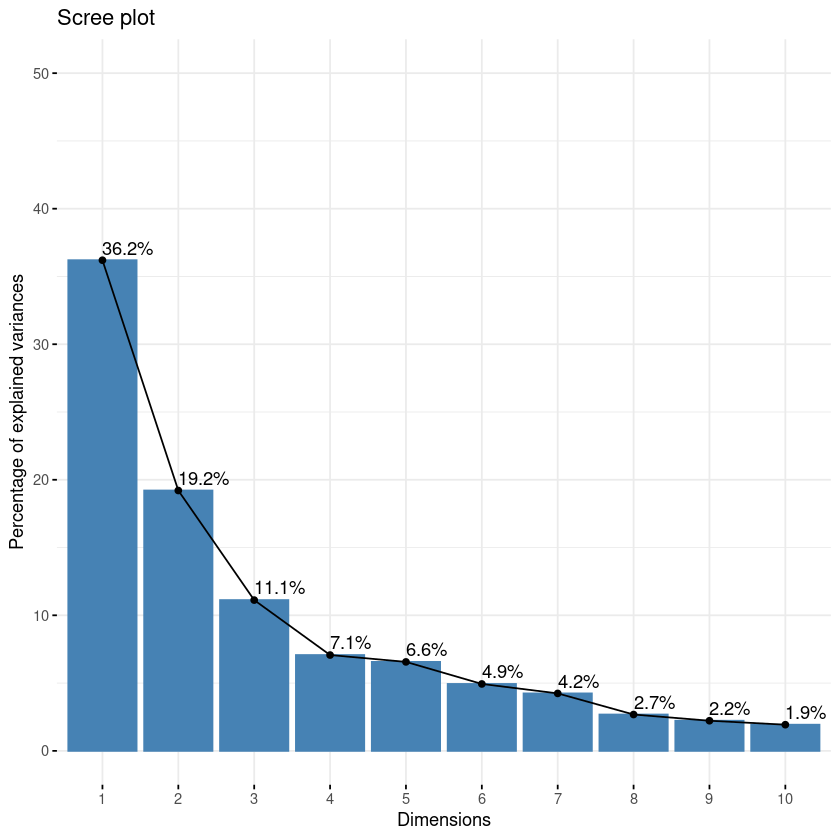

In [9]:
fviz_eig(pca_res, addlabels = TRUE, ylim = c(0, 50))

Na powyższym wykresie widać rozkład wartości własnych, uporządkowanu od najbardziej znaczących do najmniej. Wizualizacja na płaszczyźnie wykorzysta dwie pierwsze główne składowe.

In [10]:
wine$Type

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

Obserwacje w dwuwymiarowym układzie współrzędnych (po zrzutowaniu na pierwsze główne składowe) przedstawiono poniżej.

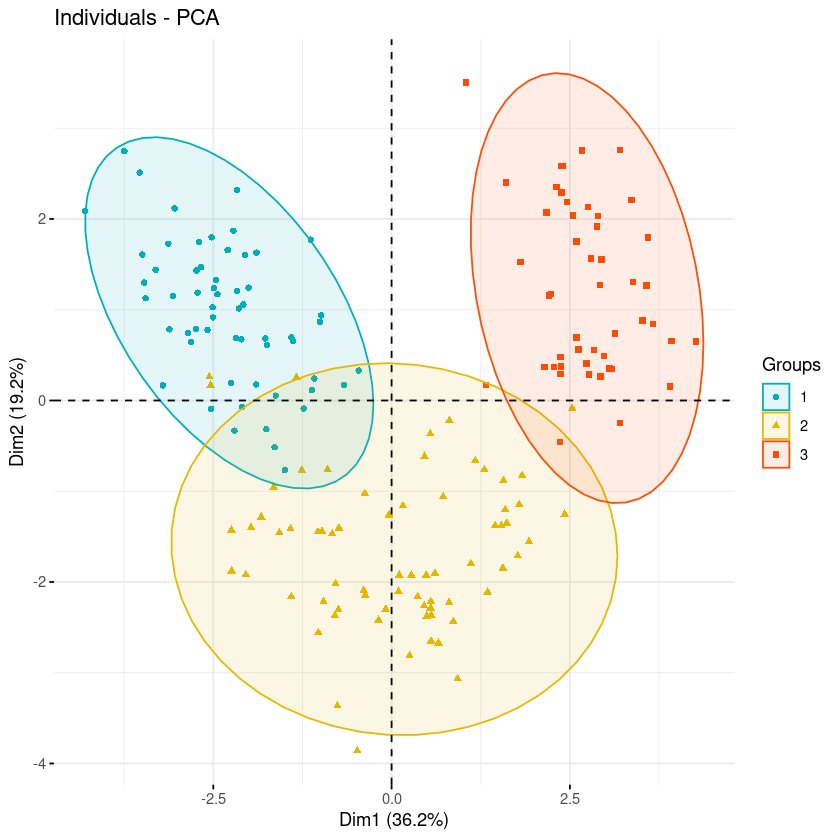

In [11]:
fviz_pca_ind(pca_res,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = wine$Type, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups",
             mean.point = FALSE
             )

<a id='PCA_SUMMARY'></a>
## Finalny rozklad próbek

Ostateczny wynik naszej implementacji przedstawia się następuąco:

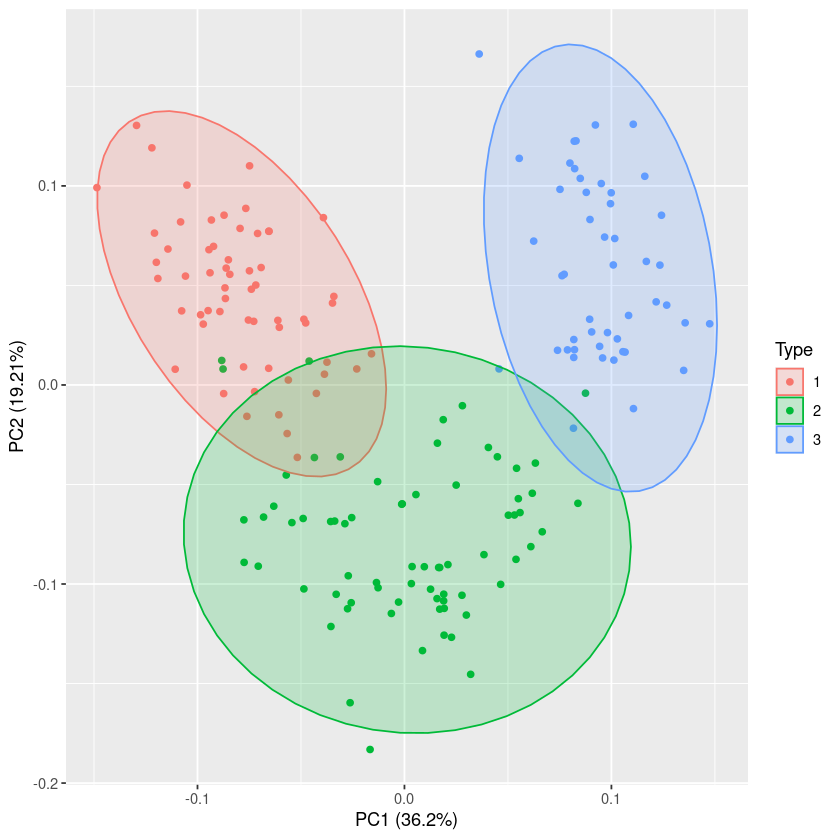

In [12]:
autoplot(pca_res, data = wine, colour = 'Type', frame = TRUE ,frame.type = 'norm')

Przetworzenie danych za pomocą algorytmu PCA pozwoliło zwizuaizować dane na płaszczyźnie, dzięki czemu tak przedstawione dane są bardziej zrozumiałe dla człowieka. Widać, że dane na płaszczyżnie skupiają się w trzech grupach, co odpowiada trzem typom win ze zbioru danych. Wizualizacja przebiegla pomyślnie,a jej wyniki są zadowalające.

# Klasteryzacja danych przy pomocy algorytmu k-means

Proces grupowania danych wykonano przy pomocy algorytmu k-średnich. Ponownie wykorzystano pakiet `factoextra`. Do oceny jakości uzyskanych w procesie klasteryzacji wyników wykorzystano pakiet `clValid`.

In [23]:
library("factoextra")
library(clValid)

Jako liczbę centroidów (klastrów) wybrano oczywiście 3 (bo wg polecenia mieliśmy przyjąć liczbę klastrów w procesie klasteryzacji z użyciem techniki k-średnich równą liczbie klas w analizowanym zbiorze danych). Do określenia liczby klastrów można wykorzystać byłoby także metodę łokciową.

Wykonaliśmy obliczenia zarówno na surowych danych (kmeans_scale) jak i na danych ustandaryzowanych/zeskalowanych (kmeans_not_scale)

In [24]:
# Compute k-means with k = 3
set.seed(123)
wine_scale_data = scale(pca_res$x[,1:2]) 
wine_not_scale_data = pca_res$x[,1:2]
kmeans_scale <- kmeans(wine_scale_data, 3, nstart = 25)
kmeans_not_scale <- kmeans(wine_not_scale_data, 3, nstart = 25)
# K-means clusters showing the group of each individuals
kmeans_scale$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 [75] 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [25]:
# dunn(clusters = res.km$cluster, Data = scale(wine[,2:14]))

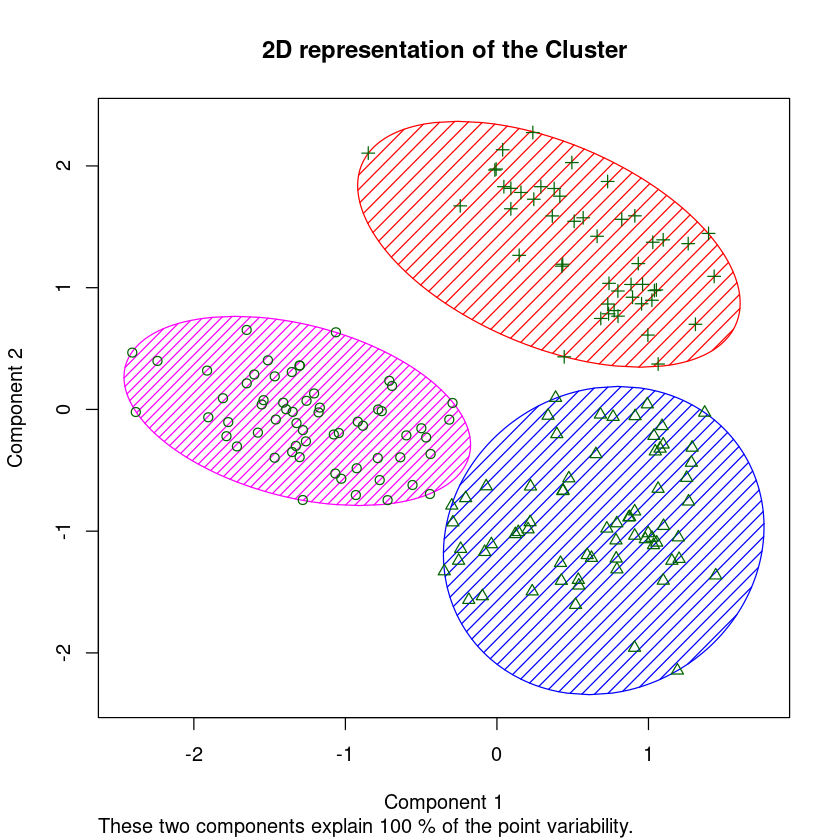

In [26]:
clusplot(wine_scale_data, kmeans_scale$cluster, main='2D representation of the Cluster',
         color=TRUE, shade=TRUE,
         lines=0)

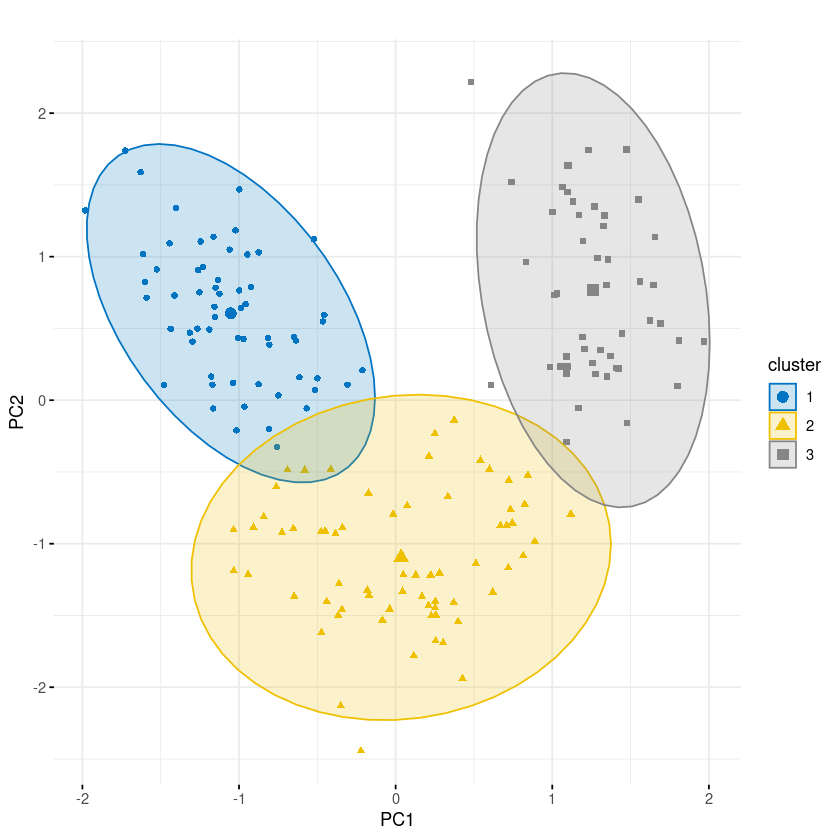

In [27]:
fviz_cluster(object = kmeans_scale, # kmeans object 
             data = wine_scale_data, # data used for clustering
             ellipse.type = "norm",
             geom = "point",
             palette = "jco",
             main = "",
             ggtheme = theme_minimal())

## Index dunna

Jako indeks wewnętrzny do oceny wyników klasteryzacji wykorzystaliśmy indeks Dunna. Jest to ocena wewnętrzna, gdyż przeprowadzona została na podstawie danych poddanych grupowaniu z użyciem funkcji oceny.

Oczekiwana jest mała odległość wewnątrz grupy (mianownik mały) i duża odległość pomiędzy grupami, stąd większe wartości są lepsze.

In [28]:
dunn(clusters = kmeans_scale$cluster, Data = wine_scale_data)

[1] 0.06692216

Uzyskana wartość indeksu byłaby wyższa, gdyby obserwacje wewnątrz klastrów były bardziej skupione. Odległości między grupami nie są duże, grupy częściowo się pokrywają, stąd stosunkowo niska wartość wskaźnika wewnętrznego.

In [29]:
dunn(clusters = kmeans_not_scale$cluster, Data = wine_not_scale_data)

[1] 0.05065606

Wartość indeksy Dunna jest prawie 20 krotnie mniejsza dla klasteryzacji wykonanej na danych nieustandaryzowanych, co pokazuje jak ważnym jest aby przed klasteryzacją ustandaryzować dane.

# Ocena klasteryzacji - index zewnętrzny

Oceny klasteryzacji dokonano tekże przy pomocy indeksu zewnętrznego, czyli dokonano oceny na podstawie danych które nie były użyte do grupowania w postaci znanych etykiet klas reprezentującyh ground truth (zmienna objaśniana).

In [30]:
kmeans_scale$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 [75] 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

Etykiety klastrów zostały dostosowane do etykiet ze zbioru danych `wines`.

In [31]:
# change cluster indexes order to match the indexes/types order from wines dataset
# kmeans_scale$cluster <- kmeans_scale$cluster - 1
# kmeans_scale$cluster[kmeans_scale$cluster == 0] <- 3
# kmeans_scale$cluster

<b>Purity</b> - miara wskazująca stosunek danych, które zostały przydzielone do takiego samego klastra, co klasa/typ danych (indeks zewnętrzny)


In [32]:
# Purity measure
purity = length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type]) / length(wine$Type)
purity

[1] 0.9719101

Widzimy, że purity klasteryzacji jest wysokie, prawie 97% danych zostało przypisane do swojego poprawnego Typu wina.

# Miary Rand Index, Precission,  Recall 

Jako, że mamy indeks zewnętrzny wskazujący przynależność danych do grup, postanowiliśmy obliczyć metryki takie jak Accuracy, precission, recall, F1, RI itd.
Na podstawie : https://danushka.net/lect/dm/Clustering.pdf - strona 30

Aby obliczyć te miary, potrzebujemy stworzyć macierz konfuzji, która wygląd następująco:
<br/>
<img src="../do_sprawka/conf_table.png" width="400"/>
<br/>
Gdzie:
- TP = liczba par elementów, które znajdują się w tym samym klastrze i należą do tej samej klasy/typu,
- FP = liczba par elementów, które znajdują się w tym samym skupieniu, ale należą do różnych klas,
- TN = Liczba par elementów, które znajdują się w różnych skupieniach i należą do różnych klas,
- FN = liczba par elementów, które znajdują się w różnych skupieniach, ale należą do tej samej klasy.

In [84]:
#liczba el klasy 1 w klastrze 1
one_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 1 ])
#liczba el klasy 1 w klastrze 2
one_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2 & wine$Type == 1 ])
#liczba el klasy 1 w klastrze 3
one_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3 & wine$Type == 1 ])
#liczba el klasy 2 w klastrze 1
two_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1 & wine$Type == 2 ])
#liczba el klasy 2 w klastrze 2
two_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 2 ])
#liczba el klasy 2 w klastrze 3
two_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3 & wine$Type == 2 ])
#liczba el klasy 3 w klastrze 1
three_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1 & wine$Type == 3 ])
#liczba el klasy 3 w klastrze 2
three_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2 & wine$Type == 3 ])
#liczba el klasy 3 w klastrze 3
three_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 3 ])

In [94]:
cluster_one_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1])
cluster_two_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2])
cluster_three_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3])

In [95]:
TPFP <- choose(cluster_one_size, 2) + 
choose(cluster_two_size, 2) + 
choose(cluster_three_size, 2)

TPFP

[1] 5246

In [96]:
TP <- choose(one_in_one, 2) + choose(one_in_two, 2) + choose(one_in_three, 2) + 
    choose(two_in_one, 2) + choose(two_in_two, 2) + choose(two_in_three, 2) + 
    choose(three_in_one, 2) + choose(three_in_two, 2) + choose(three_in_three, 2)

TP

[1] 4925

In [97]:
FP <- TPFP - TP
FP

[1] 321

In [98]:
TNFN <- cluster_one_size * cluster_two_size + cluster_one_size * cluster_three_size + cluster_two_size * cluster_three_size
TNFN

[1] 10507

In [99]:
FN <- one_in_one * one_in_two + one_in_one * one_in_three + one_in_two * one_in_three +
    two_in_two * two_in_one + two_in_two * two_in_three + two_in_one * two_in_three +
    three_in_three * three_in_one + three_in_three * three_in_two + three_in_one * three_in_two

FN


[1] 399

In [100]:
TN <- TNFN - FN
TN

[1] 10108

In [82]:
# initialize confusion matrix
confusion_matrix <- matrix(0,2,2)
confusion_matrix[1,1] <- TP
confusion_matrix[1,2] <- FN
confusion_matrix[2,1] <- FP
confusion_matrix[2,2] <- TN

confusion_matrix

4925,399
321,10108


In [102]:
# Rand Index (RI)
RI <- (TP + TN)/(TP+FP+TN+FN)
RI

[1] 0.9542944

In [103]:
#Precision
precision <- TP / (TP + FP)
precision

[1] 0.9388105

In [104]:
# Recall 
recall <- TP / (TP + FN)
recall

[1] 0.9250563

In [105]:
# F-measure
f_measure = 2*precision*recall / (precision+recall)
f_measure

[1] 0.9318827

Wyniki obliczeń podstawowych miar dały nam wartości powwyżej 92,5%, co wskazuje na wysoką skuteczność procesu klasteryzacji k-means dla zbioru danych wines.

# Podsumowanie

Analiza głównych składowych jest niezwykle przydatna przy analizie i wizualizacji wielowymiarowych zbiorów danych. Dzięki dostępnym w R pakietom można dokonać jej szybko i łatwo, a wyniki analizy za pomocą kilku komend przedstawić w formie przejrzystych wykresów.

# Wartościowe linki do PCA i k-srednich

https://developpaper.com/r-language-principal-component-analysis-pca-wine-visualization-dispersion-point-diagram-and-load-diagram-of-principal-components/

https://github.com/Deepesh87/PCA/blob/master/wine.R

https://rpubs.com/amolrk7/289957

http://rstudio-pubs-static.s3.amazonaws.com/14702_e498ca35771c4a29899c0c1cdef688c1.html

https://www.r-bloggers.com/2013/11/computing-and-visualizing-pca-in-r/

Ważne:
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/



## kmeans

WAŻNE https://rstudio-pubs-static.s3.amazonaws.com/542882_1caaeaa4c74945cb87a3483282cc31cd.html

https://www.kaggle.com/xvivancos/tutorial-clustering-wines-with-k-means\

https://www.datanovia.com/en/blog/k-means-clustering-visualization-in-r-step-by-step-guide/